In [1]:
from pandas import Series, DataFrame
import pandas as pd
import re
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---
The exam is set up as follows:
* Q1 has 4 parts, of 3 points each
* Q2-Q9: 4 points each
* Q10-Q13: 7 points each
* Q14-Q15: 9 points each
* Q16: 10 points

The exam is open-book, open-notes, open-Google. You have 3 hours. Best of luck!

---
## Question 1

![splotches](splotches.png)

Consider the above classification problem. For each question below, answer using a percentage or a fraction, and give a brief justification. You may assume that each blob has the same number of points.

### [Q1a 3 points] What accuracy can a logistic regression classifier achieve?

50%

### [Q1b 3 points] What is the accuracy of a decision tree with max_depth=1?

Recall that a depth-1 decision tree looks like this:
![depth1](depth1.png)

75%. If we say cut the tree at x = -10, the left part we get as all green, right as all red. It means overall 2 are misclassified in 8. So accuracy is 6/8 = 75%

### [Q1c 3 points] Best extension to depth-2 tree.
Suppose you could extend the max_depth=1 tree you built above by an extra level to build a max_depth=2 tree. For example, your new tree can look like one of the following, with "Condition 1" being the same as the "Condition" in the tree you built for question (b).

<table border=0 padding=0><tr><td> ![depth2a](depth2a.png) </td><td> or </td><td> ![depth2b](depth2b.png) </td></tr></table>

What is the best accuracy you can get?

75%

### [Q1d 3 points] What is the best accuracy possible using a max_depth=2 decision tree?

You are allowed to use any settings for Conditions 1, 2, and 3.

75%

---

We will analyze a dataset about political consultants and the clients they work for. Each row records the particulars of one particular consultant working for one client in one reporting period. Here, we will describe some of the important columns:
* **Reporting Period, Year, and Filing Date**: Political consultants must file records about the people they work for in every reporting period, e.g., July 1 - December 31. The year is self-explanatory. The "Filing Date" records the date on which the report was filed.
* **Filing Type, Correction Type**: This specifies the kind of report being filed. If the Filing Type was CORRECTION, the Correction Type is noted.
* **Political Consultant (PC) Name, PC Business Name**: The name of the dude doing the work, and the consulting company that he or she works for.
* **Client Name, Client Type**: The name of the person or entity for whom the consultant is working, and the type of person or entity, e.g., "public official".
* **Office Held/Sought**: The particulars of the public office that the client currently holds, or hopes to contest.
* **Description of Services Provided**: What exactly is the consultant doing for the client?

In [215]:
df = pd.read_csv('consultant.csv')
df.iloc[0]

Year                                                                                     2016
Reporting Period                                                         JULY 1 - DECEMBER 31
Filing Date                                                               2017-02-03T00:00:00
Filing Record Identifier                                                  PCF-201701241000002
Filing Type                                                                 PUBLIC DISCLOSURE
Correction Type                                                                           NaN
Political Consultant (PC) Name                                             MIRANDA, LUIS A JR
PC Business Name                                                             MIRRAM GROUP LLC
PC Business Address 1                                              215 PARK AVE SOUTH 15TH FL
PC Business City                                                                     NEW YORK
PC Business State                                           

### [Q2 4 points] What are the different types of "Filing Type"?

In [6]:
df['Filing Type'].value_counts()

PUBLIC DISCLOSURE    3994
CORRECTION            642
Name: Filing Type, dtype: int64

### [Q3 4 points] Among the rows where "Filing Type" equals CORRECTION, what fraction have a valid "Correction Type"?

The Correction Type entry is valid if it is not missing.

In [19]:
df_correction = df[df['Filing Type'] == 'CORRECTION']
len(df_correction ['Correction Type'].dropna())*1.0/len(df_correction)

0.11214953271028037

### [Q4 4 points] Is it true that whenever "Correction Type" has valid (non-missing) entries, then the "Filing Type" is CORRECTION?

In [23]:
df[df['Correction Type'].notnull()] ['Filing Type'].value_counts()

CORRECTION    72
Name: Filing Type, dtype: int64

Yes its true

### [Q5 4 points] Convert the DataFrame into a time series with Filing Date as the index.

Make sure the index is of type "datetime" and not "string". Also remember to sort the dates.

In [91]:
df['Filing Date'] = pd.to_datetime(df['Filing Date'])
df2 = df.set_index('Filing Date')
df2.sort_index(inplace = True)
df2

,Year,Reporting Period,Filing Record Identifier,Filing Type,Correction Type,Political Consultant (PC) Name,PC Business Name,PC Business Address 1,PC Business City,PC Business State,...,Client Business Address 1,Client Business City,Client Business State,Client Business Zip Code,Client Business Country,Client Business Telephone Number,Name of Person with Controlling Interest in Business,Description of Services Provided,Registration ID,Reporting Period ID
Filing Date,,,,,,,,,,,,,,,,,,,,,
2017-01-31,2016,JULY 1 - DECEMBER 31,PCF-201701281000021,PUBLIC DISCLOSURE,NaN,"MURPHY, KRISTEN",NaN,63 BALLSTON AVE APT 3,SARATOGA SPRINGS,NEW YORK,...,75 MOSHER RD,GLENMONT,NEW YORK,12077,UNITED STATES,518-281-6911,"TRESS, TRACY",LOBBYIST,PC-201701281000021,2
2017-01-31,2016,JULY 1 - DECEMBER 31,PCF-201701281000021,PUBLIC DISCLOSURE,NaN,"MURPHY, KRISTEN",NaN,63 BALLSTON AVE APT 3,SARATOGA SPRINGS,NEW YORK,...,POB 3111,KINGSTON,NEW YORK,12402,UNITED STATES,845-594-7189,NaN,"FUNDRAISING, MAILERS, GOTV EFFORTS",PC-201701281000021,2
2017-02-01,2016,JULY 1 - DECEMBER 31,PCF-201701241000007,PUBLIC DISCLOSURE,NaN,"REY, MATTHEW L","RED HORSE STRATEGIES, LLC","55 WASHINGTON ST, SUITE 624",BROOKLYN,NEW YORK,...,84 FLORIDA STREET,LONG BEACH,NEW YORK,11561,UNITED STATES,516-897-5958,NaN,PAID COMMUNICATIONS AND FIELD SERVICES,PC-201701241000007,2
2017-02-01,2016,JULY 1 - DECEMBER 31,PCF-201701241000007,PUBLIC DISCLOSURE,NaN,"REY, MATTHEW L","RED HORSE STRATEGIES, LLC","55 WASHINGTON ST, SUITE 624",BROOKLYN,NEW YORK,...,111-54 179TH STREET,JAMAICA,NEW YORK,11433,UNITED STATES,718-657-6266,NaN,PAID COMMUNICATIONS AND FIELD SERVICES,PC-201701241000007,2
2017-02-01,2016,JULY 1 - DECEMBER 31,PCF-201701241000007,PUBLIC DISCLOSURE,NaN,"REY, MATTHEW L","RED HORSE STRATEGIES, LLC","55 WASHINGTON ST, SUITE 624",BROOKLYN,NEW YORK,...,247-54 90TH AVE,BELLEROSE,NEW YORK,11426,UNITED STATES,716-343-2371,NaN,PAID COMMUNICATIONS AND FIELD SERVICES,PC-201701241000007,2
2017-02-01,2016,JULY 1 - DECEMBER 31,PCF-201701241000007,PUBLIC DISCLOSURE,NaN,"REY, MATTHEW L","RED HORSE STRATEGIES, LLC","55 WASHINGTON ST, SUITE 624",BROOKLYN,NEW YORK,...,25 TRINITIY PASS ROAD,POUND RIDGE,NEW YORK,10576,UNITED STATES,914-486-5400,NaN,PAID COMMUNICATIONS AND FIELD SERVICES,PC-201701241000007,2
2017-02-01,2016,JULY 1 - DECEMBER 31,PCF-201701241000007,PUBLIC DISCLOSURE,NaN,"REY, MATTHEW L","RED HORSE STRATEGIES, LLC","55 WASHINGTON ST, SUITE 624",BROOKLYN,NEW YORK,...,935 W WATER STREET,ELMIRA,NEW YORK,14905,UNITED STATES,607-319-5869,NaN,PAID COMMUNICATIONS AND FIELD SERVICES,PC-201701241000007,2
2017-02-01,2016,JULY 1 - DECEMBER 31,PCF-201701241000007,PUBLIC DISCLOSURE,NaN,"REY, MATTHEW L","RED HORSE STRATEGIES, LLC","55 WASHINGTON ST, SUITE 624",BROOKLYN,NEW YORK,...,2790 BROADWAY # 7 F,NEW YORK,NEW YORK,10025,UNITED STATES,917-363-0642,NaN,COMMUNICATIONS STRATEGY,PC-201701241000007,2
2017-02-01,2016,JULY 1 - DECEMBER 31,PCF-201701241000007,PUBLIC DISCLOSURE,NaN,"REY, MATTHEW L","RED HORSE STRATEGIES, LLC","55 WASHINGTON ST, SUITE 624",BROOKLYN,NEW YORK,...,633 UNION STREET # 1I,BROOKLYN,NEW YORK,11215,UNITED STATES,304-395-4833,NaN,PAID COMMUNICATIONS AND FIELD SERVICES,PC-201701241000007,2


### [Q6 4 points] When the "Client Type" is "PUBLIC OFFICIAL/CANDIDATE", who are the top 10 most frequently mentioned clients ("Client Name")?

In [92]:
df2 [df2['Client Type'] == 'PUBLIC OFFICIAL/CANDIDATE'] ['Client Name'].value_counts().sort_values(ascending = False)[:10]

LANDER, BRAD           43
DE BLASIO, BILL        39
POWERS, KEITH          33
DOYLE, JOHN            32
VAN BRAMER, JIMMY      28
WALTER, RUTH           28
KALLOS, BEN            28
SILVER, MARY           28
CURRAN, LAURA          28
SINGAS, MADELINE       28
Name: Client Name, dtype: int64

### [Q7 4 points] Which 5 political offices ("Office Held/Sought") attract the most number of clients ("Client Name")?

In [93]:
df2.drop_duplicates(subset = ['Client Name','Office Held/Sought']).groupby('Office Held/Sought')['Client Name']\
.count().sort_values(ascending = False)[:5]

Office Held/Sought
NYC COUNCIL      37
NY SENATE        16
CITY COUNCIL     10
SENATOR           8
CITY COUNCIL      8
Name: Client Name, dtype: int64

### [Q8 4 points] "PAID COMMUNICATIONS" and "FIELD SERVICES".

Under "Description of Services Provided", you will find many strings containing the words "PAID COMMUNICATIONS" and also the words "FIELD SERVICES". Find all the different ways in which these services are described.
* For example, you may find "PAID COMMUNICATIONS & FIELD SERVICES" and "PAID COMMUNICATIONS AND FIELD SERVICES".
* What other variants are there?
* NOTE: There are descriptions called just "PAID COMMUNICATIONS", that don't include "FIELD SERVICES." We are not talking about these.

In [299]:
variants =[] 
for each in df2['Description of Services Provided']:
    if 'PAID COMMUNICATIONS' and 'FIELD SERVICES' in each:
        if re.findall('PAID COMMUNICATIONS (.*?) FIELD SERVICES', each) !=[]:
            variants.append(each)
            
# Printing unique list of variants
set(variants) 


{'PAID COMMUNICATIONS & FIELD SERVICES',
 'PAID COMMUNICATIONS & FIELD SERVICES ',
 'PAID COMMUNICATIONS & FIELD SERVICES.',
 'PAID COMMUNICATIONS & FIELD SERVICES. ',
 'PAID COMMUNICATIONS AND FIELD SERVICES',
 'PAID COMMUNICATIONS AND FIELD SERVICES ',
 'PAID COMMUNICATIONS AND FIELD SERVICES.',
 'PAID COMMUNICATIONS AND FIELD SERVICES. ',
 'PAID COMMUNICATIONS AND FIELD SERVICES.  '}

### [Q9 4 points] Who uses the most different consultant companies?

A candidate can have many different political consultants, but they may be from the same company. For each "Client Name" whose "Client Type" is "PUBLIC OFFICIAL/CANDIDATE", find out the number of unique consulting companies ("PC Business Name") with whom he or she has engaged. Print out the top 10 client names who have engaged with the most consulting companies.

In [95]:
unique_consulting_companies = df2[df2['Client Type'] == 'PUBLIC OFFICIAL/CANDIDATE']\
.drop_duplicates(subset = ['Client Name','PC Business Name'])

unique_consulting_companies['Client Name'].value_counts().sort_values(ascending = False)[:10]

GONZALEZ, ERIC                  7
ALCANTARA, MARISOL              6
KLEIN, JEFFREY D                5
DE LA ROSA, CARMEN              5
CARLUCCI, DAVID                 4
AVELLA, TONY                    4
LANDER, BRAD                    4
GJONAJ, MARK                    4
FERRERAS-COPELAND, JULISSA      4
KAMINSKY, TODD                  4
Name: Client Name, dtype: int64

### [Q10 7 points] Plot the top 10  "Description of Services Provided", after cleaning up these descriptions.

As we saw with "PAID COMMUNICATIONS" and , there are many ways of saying the same thing. So, we will try to come up with canonical descriptions.

For each string under "Description of Services Provided", do the following steps (in this particular order):
* Remove any spaces from the beginning of the string
* Remove any spaces at the end of the string
* Remove any full-stop ('.') at the end of the string

Store these cleaned description in a new column called "Cleaned Descriptions", and plot the top 10 most frequent "Cleaned Descriptions".

Text(0,0.5,'Frequency')

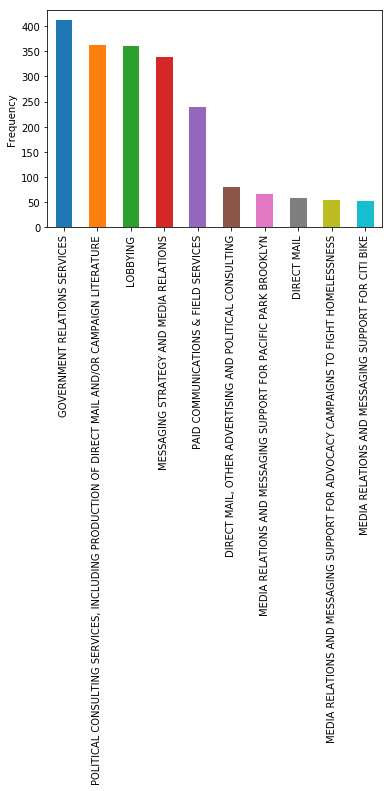

In [100]:
def clean_descriptions(s):
    return s.lstrip().rstrip().rstrip('.')

df2['Cleaned Descriptions'] = df2['Description of Services Provided'].map(clean_descriptions)

df2['Cleaned Descriptions'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')
ylabel('Frequency')

### [Q11 7 points] Plot the number of filings for each month in the dataset.

The x-axis should go from Jan 2017 to July 2018. Use the "Filing Date" as the date of filing.

Text(0,0.5,'# of filings')

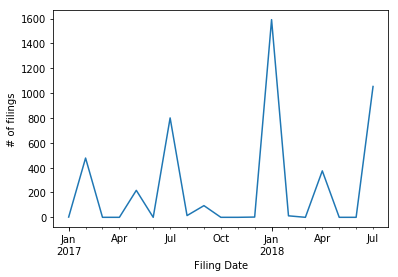

In [115]:
df2['Year'].resample('M', kind = 'period').count().plot()
ylabel('# of filings')

### [Q12 7 points] What are the programs where consultants help with media relations and messaging support?

In the "Cleaned Descriptions", you will find several strings of the form "MEDIA RELATIONS AND MESSAGING SUPPORT". Each such string lists the "program" which is getting the support. For example:
* MEDIA RELATIONS AND MESSAGING SUPPORT FOR PACIFIC PARK BROOKLYN
    * The program is "FOR PACIFIC PARK BROOKLYN"
* MEDIA RELATIONS AND MESSAGING SUPPORT FOR LINKNYC
    * The program is "FOR LINKNYC"
* MEDIA RELATIONS AND MESSAGING SUPPORT AROUND FREELANCER ISSUES
    * The program is "AROUND FREELANCER ISSUES"

Print out all the unique programs getting such public relations support.

**NOTE**: If you were unable to compute the Cleaned Descriptions in Q10, just say so in a comment, and use
> df['Cleaned Descriptions'] = df['Description of Services Provided']

In [153]:
programs = []
for s in df2['Cleaned Descriptions']:
    if 'MEDIA RELATIONS AND MESSAGING SUPPORT' in s:
        program_string = re.sub('MEDIA RELATIONS AND MESSAGING SUPPORT ', '', s)
        programs.append(program_string)

set(programs)

{'AROUND FREELANCER ISSUES',
 'AROUND FREELANCER ISSUES, INCLUDING NONPAYMENT PROTECTION',
 'BERLINROSEN DOES AROUND FREELANCER ISSUES',
 'BERLINROSEN DOES AROUND FREELANCER ISSUES, INCLUDING NONPAYMENT PROTECTION',
 'BERLINROSEN DOES FOR CITI BIKE',
 'BERLINROSEN DOES FOR LIBRARY REDEVELOPMENT',
 'BERLINROSEN DOES FOR PACIFIC PARK BROOKLYN',
 'BERLINROSEN DOES FOR SEVERAL NON-PROFIT PROGRAMS AND PROJECTS',
 'BERLINROSEN DOES FOR SEVERAL NON-PROFIT PROGRAMS AND PROJECTS, AND ADVOCACY FOR PEOPLE WITH HIV/AIDS',
 'BERLINROSEN DOES FOR SEVERAL NON-PROFIT PROGRAMS, PROJECTS AND ADVOCACY FOR PEOPLE WITH HIV/AIDS',
 'BERLINROSEN DOS FOR SEVERAL NON-PROFIT PROGRAMS AND PROJECTS',
 'FOR ADVOCACY CAMPAIGNS TO FIGHT HOMELESSNESS',
 'FOR CITI BIKE',
 'FOR CRIMINAL JUSTICE REFORM EFFORTS IN NY',
 'FOR LIBRARY REDEVELOPMENT',
 'FOR LINKNYC',
 'FOR PACIFIC PARK BROOKLYN',
 'FOR PARK BROOKLYN',
 'FOR SEVERAL NON-PROFIT PROGRAMS  AND PROJECTS, AND ADVOCACY FOR PEOPLE WITH HIV/AIDS',
 'FOR SEVERAL NON-

### [Q13 7 points] Unique senate districts.

Consider all "Office Held/Sought" fields of the form "NYS SENATE *blah* DISTRICT". Extract the district identifier (*blah*) and figure out the number of unique districts represented in the data. For example:
* "NYS SENATE 31ST DISTRICT" $\Rightarrow$ district identifier is "31ST"

In [194]:
x = []
for each in df2['Office Held/Sought'].dropna():
    if 'NYS SENATE' in each:
        #print each
        x_string = re.findall('NYS SENATE (.*?) DISTRICT', each)
        x.append(x_string)

senate_districts = []

for d in x:
    
    if d!=[] and d!=['']:
        senate_districts.append(d)

new_list = []
for i in range(len(senate_districts)):
    new_list.append(senate_districts[i][0])
    
print set(new_list)
# Total no of unique senate districts
print len(set(new_list))        

set(['53RD', '36TH', '38TH', '13TH', '31ST', '18TH', '34TH', '23RD', '80TH', '11TH', '20TH'])
11


### [Q14 9 points] Find clients who hire multiple consultant firms for the same job.

For each pair of "Client Name" and "Cleaned Descriptions", figure out the number of unique "PC Business Names" who have done work of that description for that client. List the clients who had 4 or more PC Businesses work on some "Cleaned Description."
For example:
* If client BILL BLASIO had 3 consulting firms for "DIRECT VOTER CONTACT", 2 firms for "DIRECT MAIL" and 5 firms for "PAID COMMUNICATIONS", we want to list BILL BLASIO in the output since "PAID COMMUNICATIONS" had 5 firms.
* If client ERIC GONZALEZ had 3 firms for "DIRECT VOTER CONTACT" and 3 firms for "DIRECT MAIL", we won't output ERIC GONZALEZ since all Cleaned Descriptions had fewer than 4 associated firms.

In [235]:
df3 = df2.drop_duplicates(subset = ['Client Name','Cleaned Descriptions','PC Business Name'])
multiple_consultants = df2.groupby(['Client Name','Cleaned Descriptions'])['PC Business Name'].count()
#multiple_consultants[multiple_consultants['Client Name'] == 'BILL BLASIO']
multiple_consultants[multiple_consultants >= 4].reset_index()

,Client Name,Cleaned Descriptions,PC Business Name
0,82ND STREET ACADEMICS,STRATEGIC COUNSEL-NYC COUNCIL AND CITY AGENCIES,4
1,AB STABLE LLC (ANBANG WALDORF ASTORIA),BERLIN ROSEN PROVIDES MESSAGING STRATEGY AND M...,4
2,AB STABLE LLC (ANBANG WALDORF ASTORIA),BERLINROSEN PROVIDES MESSAGING STRATEGY AND ME...,23
3,AB STABLE LLC (ANBANG WALDORF ASTORIA),MESSAGING STRATEGY AND MEDIA RELATIONS,14
4,"ABREU, RANDY",PAID COMMUNICATIONS & FIELD SERVICES,8
5,"ADAMS, ADRIENNE",PAID COMMUNICATIONS & FIELD SERVICES,4
6,AIRBNB,COMMUNICATIONS STRATEGY AND CREATIVE SERVICES,16
7,ALLIANCE FOR CONEY ISLAND INC,LOBBYING,4
8,"ALLIANCE FOR CONEY ISLAND, INC.",LOBBYING,4
9,APICHA,LOBBYING,6


### [Q15 9 points] Busy seasons

For each "Political Consultant (PC) Name", do the following:
* Figure out the number of unique Client Names associated with this Political Consultant (PC) Name in each Reporting Period.
* Find the Reporting Period when he/she had the most unique Client Names. Call this the "busy season" for this particular Political Consultant.

Now, for each Reporting Period, figure out how many Political Consultant (PC) Names call it their busy season.

Note: A Political Consultant may do multiple jobs for a given Client in each Reporting Period.

In [286]:
# No of unique client names for each political consultant in each period
df3 = df2.drop_duplicates(subset = (['Political Consultant (PC) Name','Client Name','Reporting Period'])).\
groupby(['Political Consultant (PC) Name','Reporting Period'])['Client Name'].count()

# Reporting period when most unique clients
busy_season = df3.unstack().T.idxmax()


busy_season = busy_season.reset_index().set_index('Political Consultant (PC) Name')

busy_season.columns = ['Reporting Period']
busy_season['Reporting Period'].value_counts()

JULY 1 - DECEMBER 31    31
JANUARY 1 - JUNE 30     27
Name: Reporting Period, dtype: int64

### [Q16 10 points] Connections between public officials and businesses

Let's say a politician P and a business B are *connected* if there is a consultant firm C that is consulting for both P and B. If there is only one such consulting firm, the "strength" of the connection is 1. If there are two different consulting firms consulting for both P and B, the strength of the connection between P and B is 2, and so on. If the same consultant firm is linked to P and B in two different "Reporting Periods", that still counts as 1 when computing connection strength between P and B.

Find the public official and the business with the strongest connection.

Note: A politician has "Client Type" as "PUBLIC OFFICIAL/CANDIDATE", while every other "Client Type" is a business. The consultant firm is specified by "PC Business Name".

In [301]:
df2['Client Type'].value_counts()

CLIENT BUSINESS NAME         3434
PUBLIC OFFICIAL/CANDIDATE    1202
Name: Client Type, dtype: int64

In [294]:
df2['Client Name']

Filing Date
2017-01-31                               TRESS CAPITAL ADVISORS
2017-01-31                                      CAHILL, KEVIN  
2017-02-01                                     ERAMO, ANTHONY  
2017-02-01                                    ADAMS, ADRIENNE  
2017-02-01                                       BLOCK, BRYAN  
2017-02-01                                       BOAK, ALISON  
2017-02-01                                DANKS BURKE, LESLIE  
2017-02-01                                  DINOWITZ, JEFFREY  
2017-02-01                                   GALLAGHER, EMILY  
2017-02-01                                   LANDESMAN, DODGE  
2017-02-01                                      LASHER, MICAH  
2017-02-01                                    MOYA, FRANCISCO  
2017-02-01                                  PETERS, CHRISTINE  
2017-02-01                              PHEFFER AMATO, STACEY  
2017-02-01                                    RIVERA, GUSTAVO  
2017-02-01                  

#From the client type column we know whether the client is a politician or a business. 
#So now for each Politician and business combination we can find whether a consulting firm is belonging to each pair in each period
#We can then find out the pairs with the maximum such counts